In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from obspy import read

from obspy.io.xseed import Parser

from obspy.signal import PPSD

In [9]:
#root = '/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
eq_list = os.listdir(root)

In [10]:
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [11]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [5]:
eq_no = 0
for eq_name in eq_with_data[0:1]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
        
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv

SyntaxError: unexpected EOF while parsing (449620124.py, line 20)

In [48]:
picks

NameError: name 'picks' is not defined

In [17]:
st[0].stats

         network: BK
         station: JCC
        location: 00
         channel: HHE
       starttime: 2018-01-25T17:19:34.118393Z
         endtime: 2018-01-25T17:29:34.108393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 110, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 450560})

In [5]:
eq_no = 0
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)

                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude

                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200: 
                    dists.append(distance)
                    print(distance)
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)
                    sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                    df[eq_mag_str][int(distance//25)] = sum_abs_displ
                    current = ad[eq_mag_str][int(distance//25)]
                    current.append(abs_displ[pick_samples:pick_samples+window])
                    ad[eq_mag_str][int(distance//25)]= current
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

0 out of 1026
1 out of 1026
2 out of 1026
3 out of 1026
36850
32675
32450
32807
31577
32263
32912
32255
32429
33183
32770
4 out of 1026
5 out of 1026
35127
20243
20781
31916
31997
22046
34100
6 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31723
31578
7 out of 1026
8 out of 1026
9 out of 1026
32435
32409
34497
10 out of 1026
32000
11 out of 1026
32351
34393
32239
32077
32161
12 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32553
32281
13 out of 1026
32353
32119
14 out of 1026
31388
31954
31995
31331
31277
15 out of 1026
32177
22590
30923
31588
23025
33120
31591
23535
30903
34100
34100
22947
22947
32276
22219
31699
22475
31796
22275
23401
31071
16 out of 1026
31353
17 out of 1026
32680
32564
18 out of 1026
19 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31994
31811
20 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34729
21 out of 1026
22 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31884
31790
23 out of 1026
35358
24 out of 1026
32066
34103
32536
32144
25 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32599
26 out of 1026
34300
32932
34255
32323
32359
32603
31689
27 out of 1026
28 out of 1026
32151
29 out of 1026
31549
31288
30 out of 1026
31911
31656
31 out of 1026
32 out of 1026
34805
33018
32282
33015
32236
32346
34809
33 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34101
34 out of 1026
33560
32556
28338
32575
28834
31897
28051
33312
33483
32434
35 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


36 out of 1026
32507
32055
32200
31731
32240
32594
31708
32103
32479
32123
31941
31699
32106
31735
32122
32267
32115
32222
32182
31857
32058
32551
32116
29997
31864
31859
31481
31969
31937
32049
31440
32006
32244
32054
32074
32192
32279
32056
32059
31985
31152
31325
30401
31474
32059
31078
34396
32244
31218
31711
31295
32438
31518
32406
32233
31731
32349
37 out of 1026
33406
35032
34297
33055
30904
34798
32911
32094
32039
36596
36186
33119
33399
38 out of 1026
33279
36117
32634
32881
31696
32813
32110
25851
34100
32064
34100
31751
33095
39 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31484
31595
40 out of 1026
41 out of 1026
42 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


43 out of 1026
44 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31958
31994
45 out of 1026
32304
31276
46 out of 1026
32531
34214
34214
32333
32045
33531
27184
30584
47 out of 1026
48 out of 1026
32065
49 out of 1026
32058
50 out of 1026
32058
51 out of 1026
52 out of 1026
31932
30705
46807
32495
53 out of 1026
40376
54 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31182
31194
55 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31846
31688
56 out of 1026
31975
31120
31974
33461
31170
57 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34121
58 out of 1026
59 out of 1026
32395
60 out of 1026
61 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


62 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32058
31934
63 out of 1026
32285
64 out of 1026
65 out of 1026
32483
32823
32439
32557
66 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

31610
32066
32066
34128
31532
31835
33242
67 out of 1026
68 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32839
32481
69 out of 1026
70 out of 1026
32118
31193
71 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32466
32330
72 out of 1026
32051
31108
30697
32111
73 out of 1026
32618
32495
35012
34648
74 out of 1026
25793
75 out of 1026
76 out of 1026
31590
31323
31753
31971
31881
30827
32296
31679
32147
32014
31475
31269
31659
32481
31851
31545
31873
31854
31615
31832
31860
31104
31969
31544
31718
77 out of 1026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48410
32212
31272
78 out of 1026
79 out of 1026
80 out of 1026
81 out of 1026
30846


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31591
32066
31131
32463


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32409
82 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31764
31909
83 out of 1026
35395
84 out of 1026
31029
31402
31606
31344
30824
32220
32517
32291
30495
31079
31301
31043
30779
31290
31075
31566
31610
32388
32373
31810
31652
32057
31438
31182
31046
31376
31477
31766
31939
34201
30707
31248
32226
31317
32217
32104
31820
85 out of 1026
86 out of 1026
34299
37513
32044
87 out of 1026
88 out of 1026
32176
32377
31173
30767
89 out of 1026
37806
31660
32006
90 out of 1026
32183
91 out of 1026
35135
31175
33774
34979
31987
34152
92 out of 1026
31599
31690
32703
93 out of 1026
31626
94 out of 1026
95 out of 1026
37301
31738
32254
21635
32462
96 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


97 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31661
31682
98 out of 1026
99 out of 1026
32482
32482
31481
31625
31819


20190131_194949.a
9 Trace(s) in Stream:
CX.HMBCX..HHE | 2019-01-31T19:44:44.679999Z - 2019-01-31T19:54:50.669999Z | 100.0 Hz, 60600 samples
CX.HMBCX..HHN | 2019-01-31T19:44:45.679999Z - 2019-01-31T19:54:52.669999Z | 100.0 Hz, 60700 samples
CX.HMBCX..HHZ | 2019-01-31T19:44:48.679999Z - 2019-01-31T19:54:51.669999Z | 100.0 Hz, 60300 samples
CX.PB01..HHE  | 2019-01-31T19:44:45.158393Z - 2019-01-31T19:54:55.628393Z | 100.0 Hz, 61048 samples
CX.PB01..HHN  | 2019-01-31T19:44:43.958393Z - 2019-01-31T19:54:50.028393Z | 100.0 Hz, 60608 samples
CX.PB01..HHZ  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.388393Z | 100.0 Hz, 60770 samples
CX.PB08..HHE  | 2019-01-31T19:44:46.698393Z - 2019-01-31T19:54:54.838393Z | 100.0 Hz, 60815 samples
CX.PB08..HHN  | 2019-01-31T19:44:47.448394Z - 2019-01-31T19:54:55.748394Z | 100.0 Hz, 60831 samples
CX.PB08..HHZ  | 2019-01-31T19:44:44.298393Z - 2019-01-31T19:54:50.558393Z | 100.0 Hz, 60627 samples


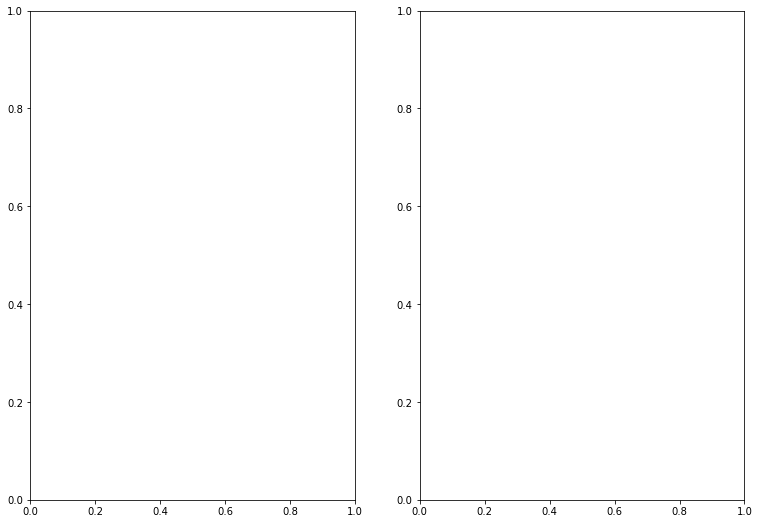

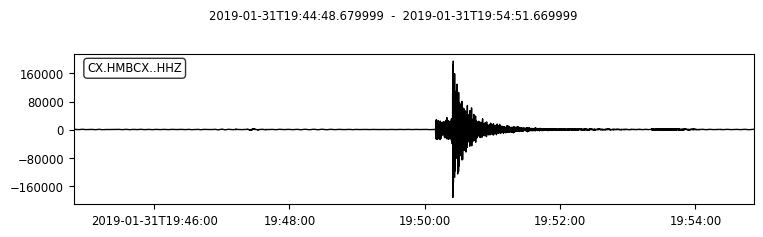

59.1141655328


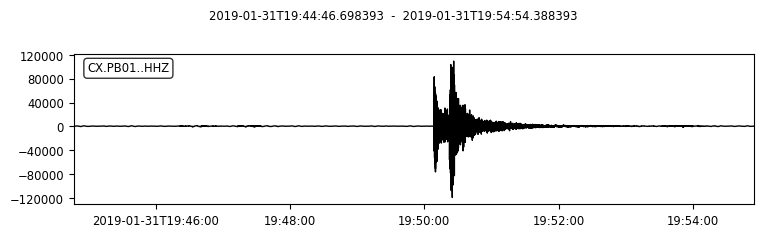

382.053391148


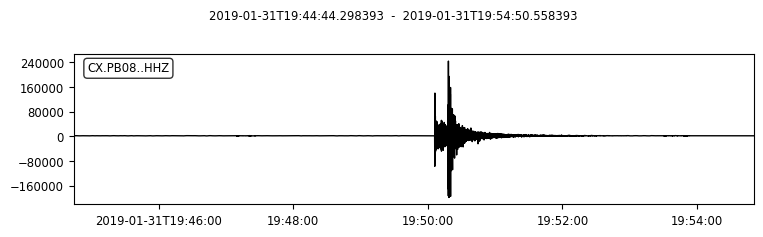

551.552115504
saved!
20190131_130953.a
3 Trace(s) in Stream:
TC.RAFA..HHE | 2019-01-31T13:04:53.370000Z - 2019-01-31T13:14:53.370000Z | 100.0 Hz, 60001 samples
TC.RAFA..HHN | 2019-01-31T13:04:53.370000Z - 2019-01-31T13:14:53.370000Z | 100.0 Hz, 60001 samples
TC.RAFA..HHZ | 2019-01-31T13:04:53.370000Z - 2019-01-31T13:14:53.370000Z | 100.0 Hz, 60001 samples


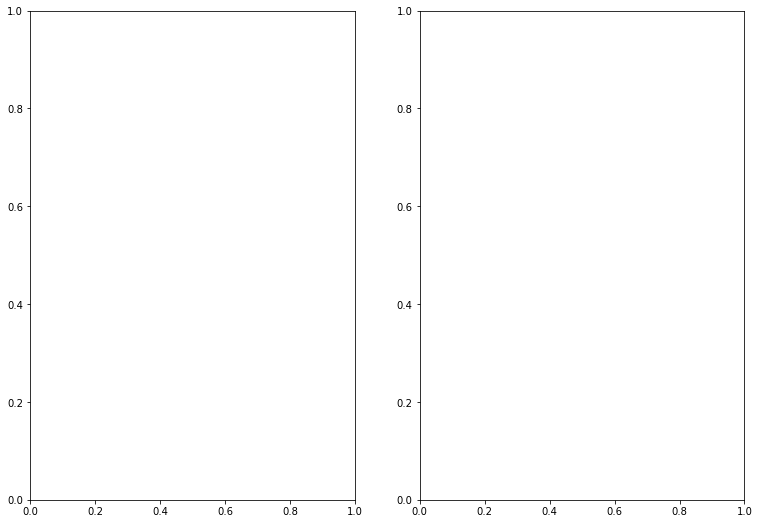

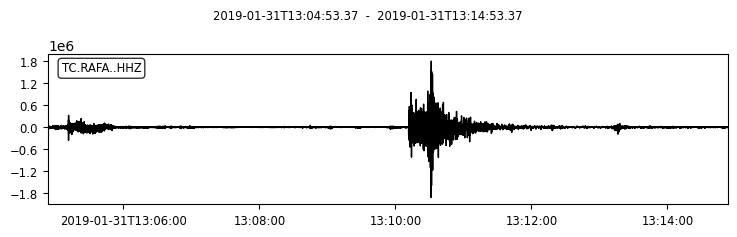

121.13975747
saved!
20190131_130350.a
6 Trace(s) in Stream:
XO.WD46..HH1 | 2019-01-31T12:58:50.895500Z - 2019-01-31T13:08:50.885500Z | 100.0 Hz, 60000 samples
XO.WD46..HH2 | 2019-01-31T12:58:50.895501Z - 2019-01-31T13:08:50.885501Z | 100.0 Hz, 60000 samples
XO.WD46..HHZ | 2019-01-31T12:58:50.895500Z - 2019-01-31T13:08:50.885500Z | 100.0 Hz, 60000 samples
XO.WD54..HH1 | 2019-01-31T12:58:50.899700Z - 2019-01-31T13:08:50.889700Z | 100.0 Hz, 60000 samples
XO.WD54..HH2 | 2019-01-31T12:58:50.899700Z - 2019-01-31T13:08:50.889700Z | 100.0 Hz, 60000 samples
XO.WD54..HHZ | 2019-01-31T12:58:50.899700Z - 2019-01-31T13:08:50.889700Z | 100.0 Hz, 60000 samples


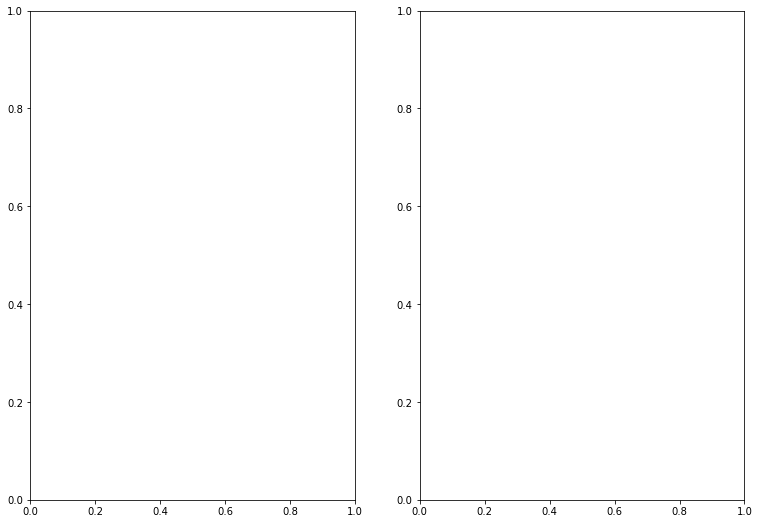

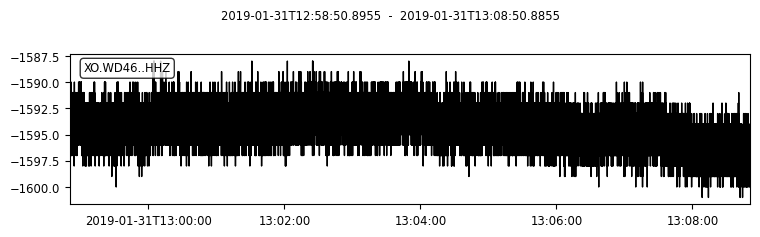

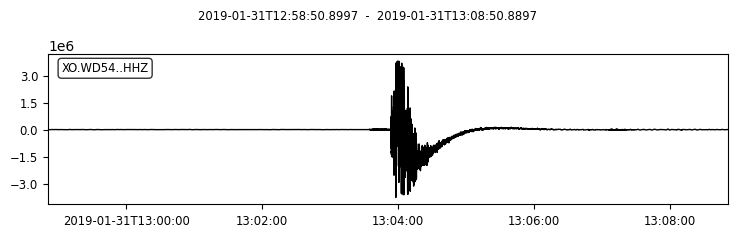

196.138521457
saved!
20190131_101656.a
3 Trace(s) in Stream:
PR.PCDR..BHE | 2019-01-31T10:11:56.850000Z - 2019-01-31T10:21:56.825000Z | 40.0 Hz, 24000 samples
PR.PCDR..BHN | 2019-01-31T10:11:56.850000Z - 2019-01-31T10:21:56.825000Z | 40.0 Hz, 24000 samples
PR.PCDR..BHZ | 2019-01-31T10:11:56.850000Z - 2019-01-31T10:21:56.825000Z | 40.0 Hz, 24000 samples


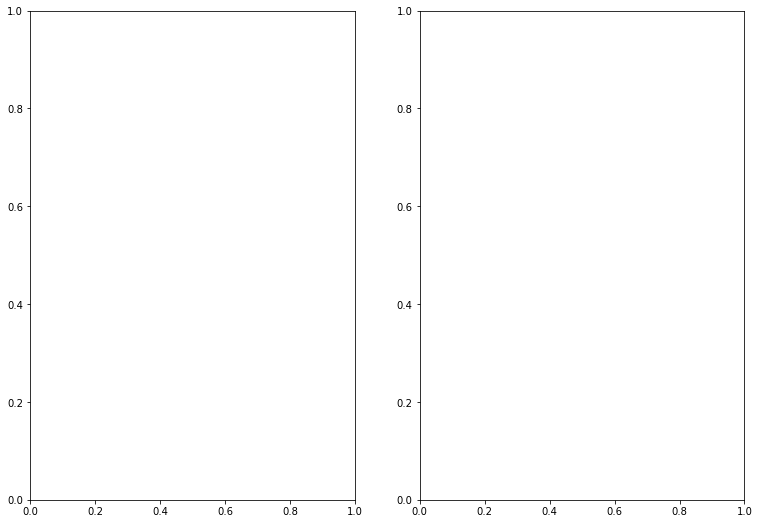

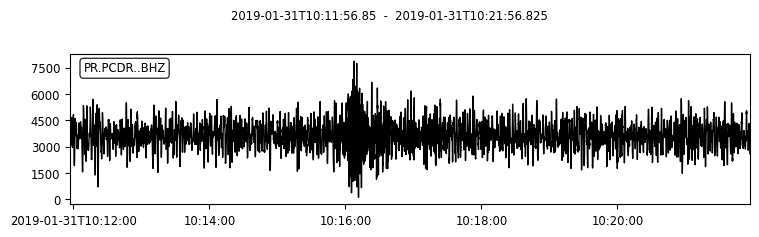

0.775602021396
saved!
20190131_085520.a
36 Trace(s) in Stream:

AV.AKBB..BHE | 2019-01-31T08:50:20.080000Z - 2019-01-31T09:00:20.080000Z | 50.0 Hz, 30001 samples
...
(34 other traces)
...
AV.ZRO..BHZ | 2019-01-31T08:50:20.080000Z - 2019-01-31T09:00:20.080000Z | 50.0 Hz, 30001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


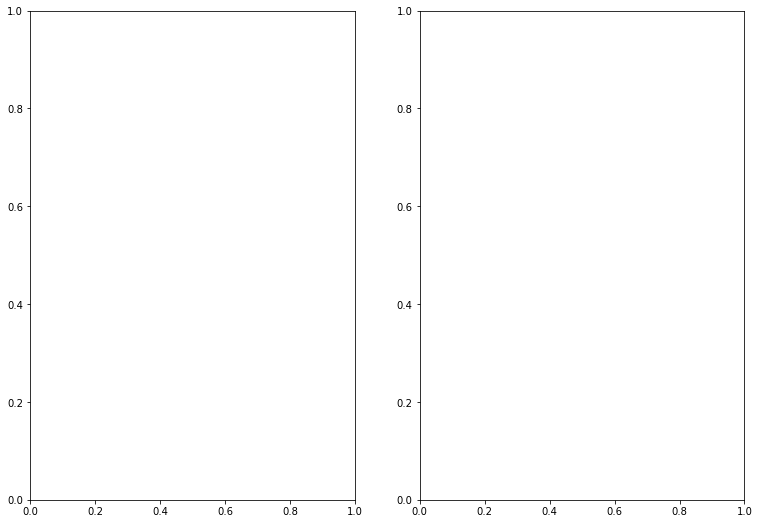

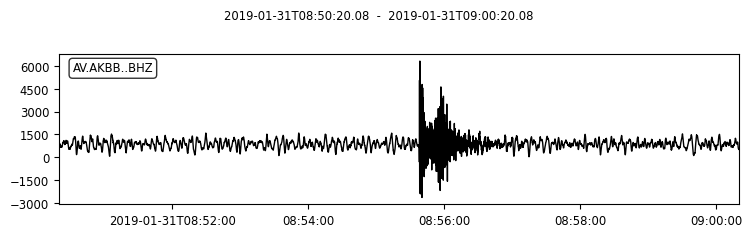

9.87037453675


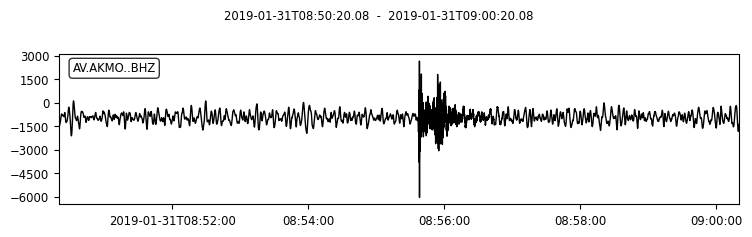

8.11696504182


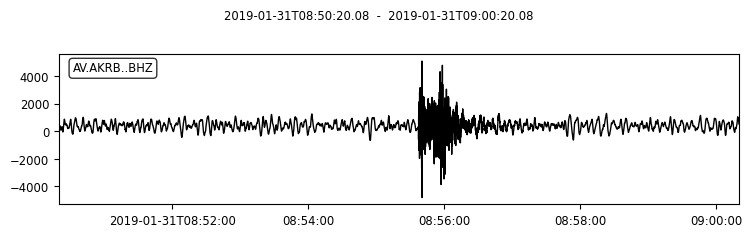

10.6341264081


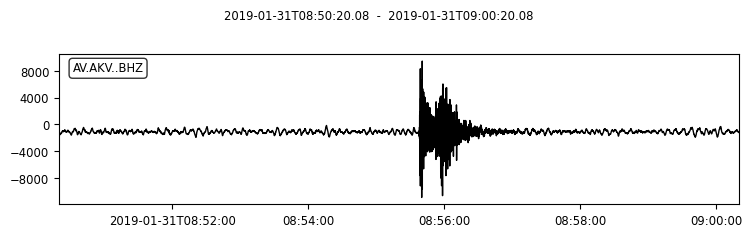

18.5043468397


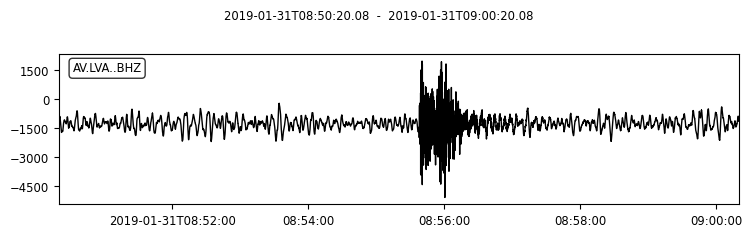

5.85805181145


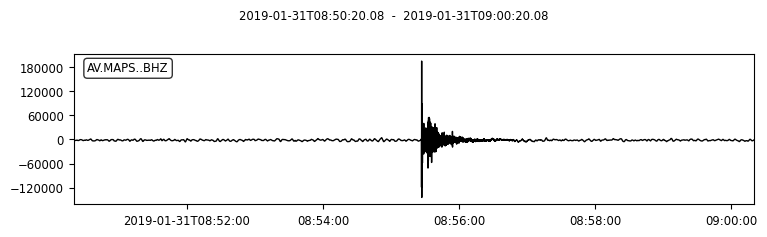

63.0606412515


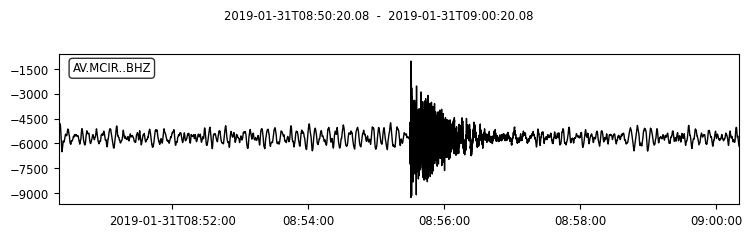

5.53904088295


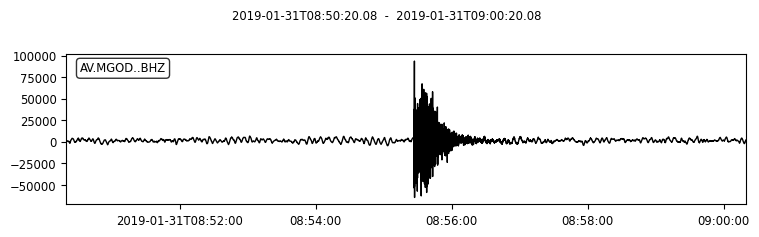

19.1223916531


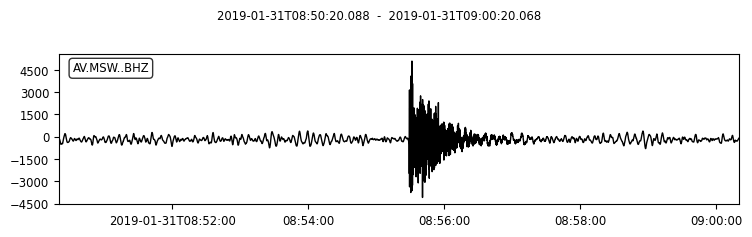

27.0235510613


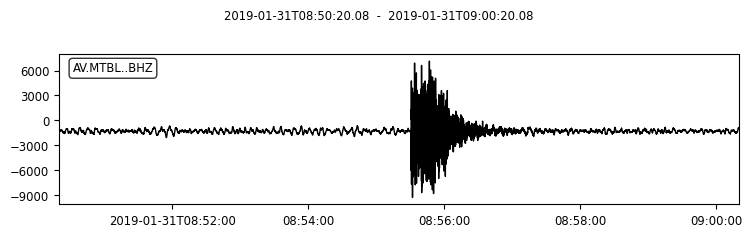

16.4674334975


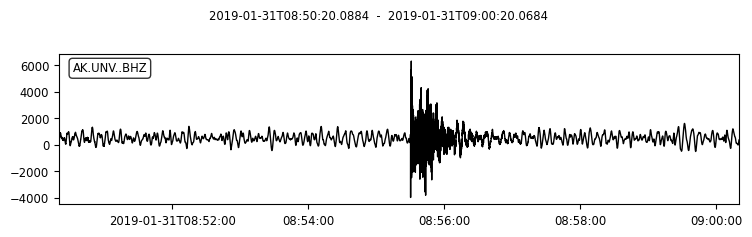

11.162500452


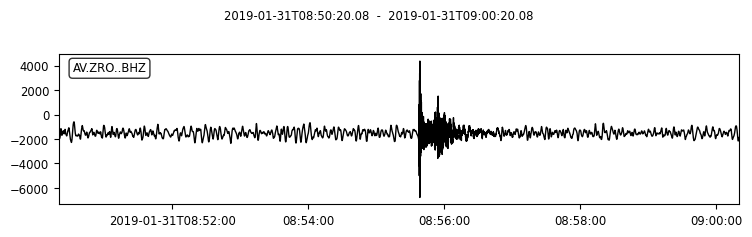

8.39928999188
saved!
20190131_082011.a
6 Trace(s) in Stream:
PR.PCDR..BHE | 2019-01-31T08:15:11.150000Z - 2019-01-31T08:25:11.150000Z | 40.0 Hz, 24001 samples
PR.PCDR..BHN | 2019-01-31T08:15:11.150000Z - 2019-01-31T08:25:11.150000Z | 40.0 Hz, 24001 samples
PR.PCDR..BHZ | 2019-01-31T08:15:11.150000Z - 2019-01-31T08:25:11.150000Z | 40.0 Hz, 24001 samples
PR.SMDR..BHE | 2019-01-31T08:15:11.155000Z - 2019-01-31T08:25:11.130000Z | 40.0 Hz, 24000 samples
PR.SMDR..BHN | 2019-01-31T08:15:11.155000Z - 2019-01-31T08:25:11.130000Z | 40.0 Hz, 24000 samples
PR.SMDR..BHZ | 2019-01-31T08:15:11.155000Z - 2019-01-31T08:25:11.130000Z | 40.0 Hz, 24000 samples


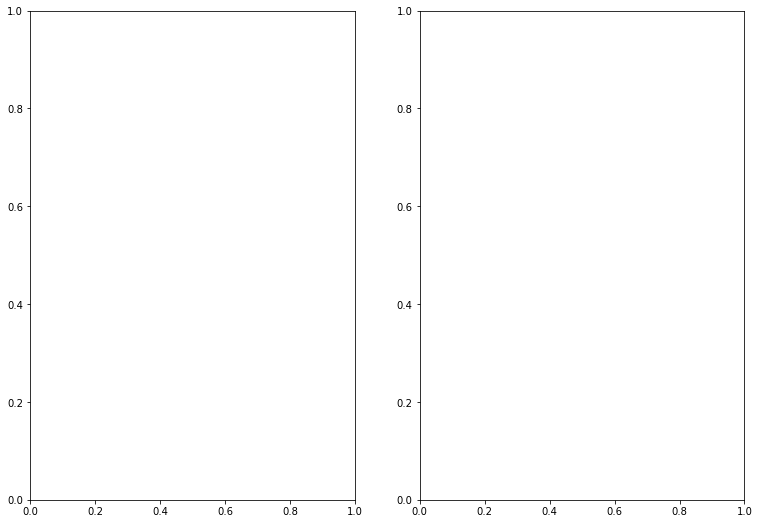

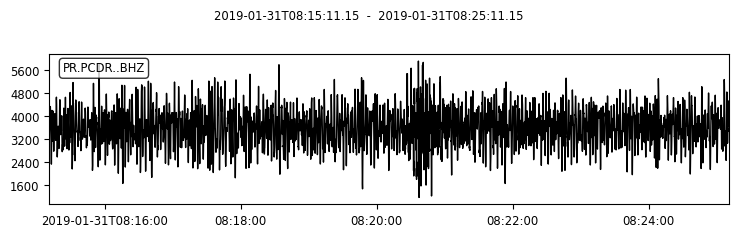

1.25396332679


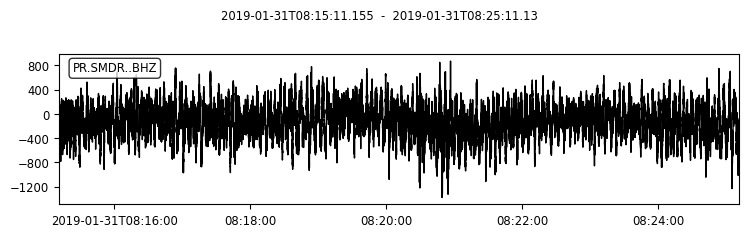

1.60673673301
saved!
20190131_054201.a
3 Trace(s) in Stream:
C1.AF01..HHE | 2019-01-31T05:37:01.530000Z - 2019-01-31T05:47:01.530000Z | 100.0 Hz, 60001 samples
C1.AF01..HHN | 2019-01-31T05:37:01.530000Z - 2019-01-31T05:47:01.530000Z | 100.0 Hz, 60001 samples
C1.AF01..HHZ | 2019-01-31T05:37:01.530000Z - 2019-01-31T05:47:01.530000Z | 100.0 Hz, 60001 samples


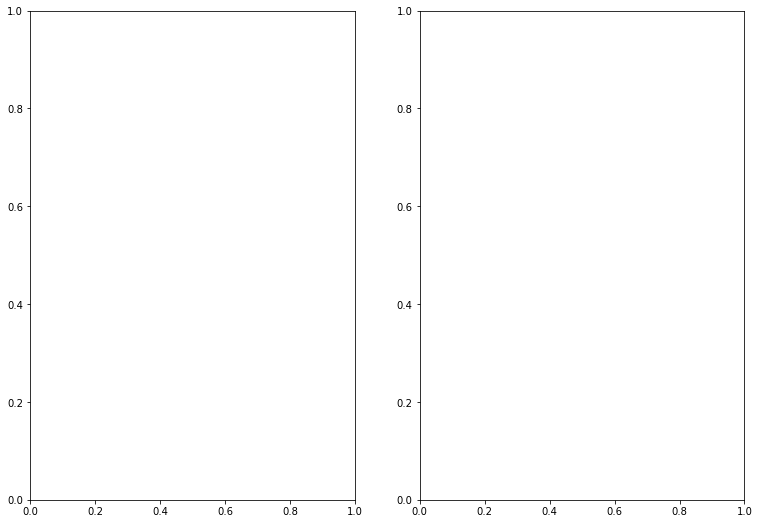

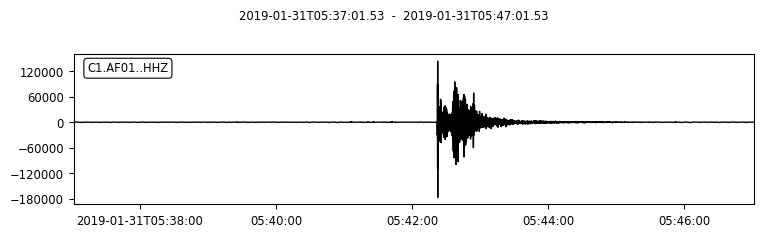

420.530646565
saved!
20190131_044030.a
9 Trace(s) in Stream:
SV.CNCH..HHE | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.CNCH..HHN | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.CNCH..HHZ | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PACA..HHE | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PACA..HHN | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PACA..HHZ | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PAVA..HHE | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PAVA..HHN | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
SV.PAVA..HHZ | 2019-01-31T04:35:30.240000Z - 2019-01-31T04:45:30.240000Z | 100.0 Hz, 60001 samples
20190131_035250.a
36 Trace(s) in Stream:

GM.AD0

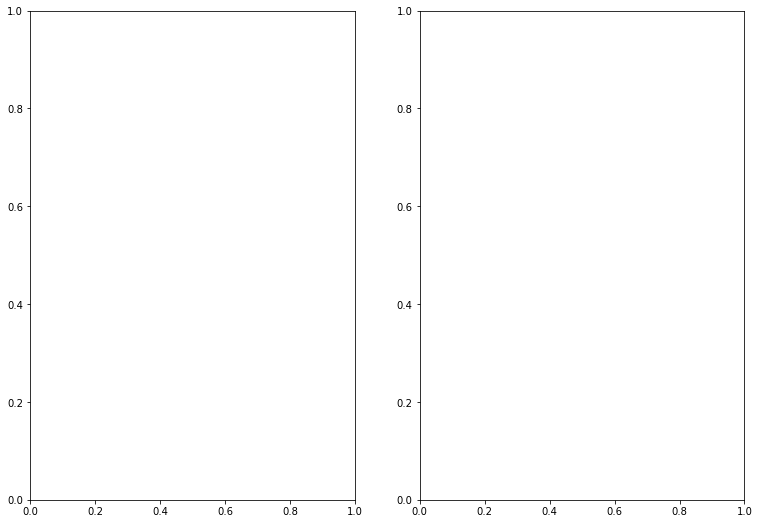

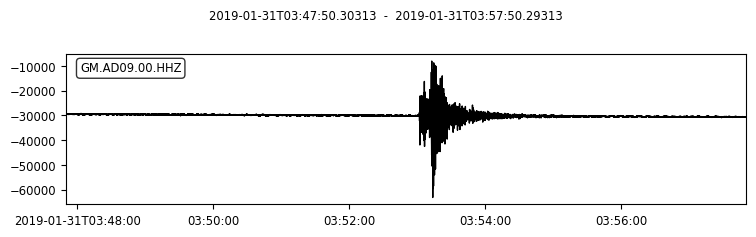

78.1016096897


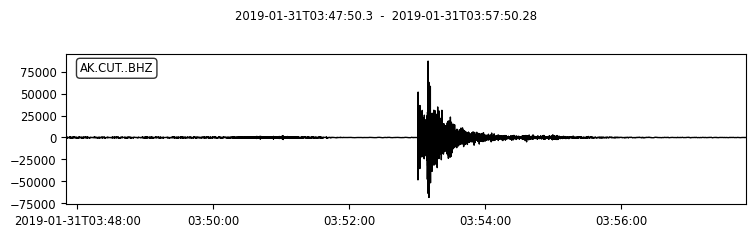

153.334672075


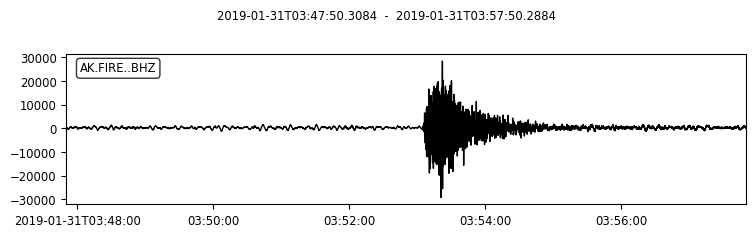

25.0781929607


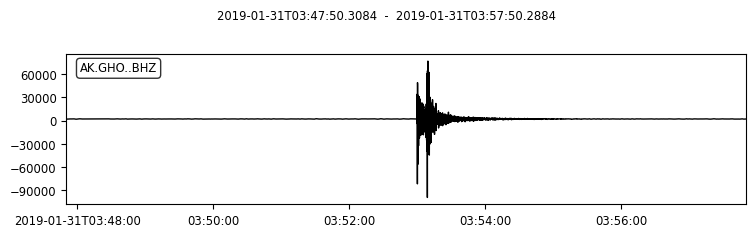

286.493839927


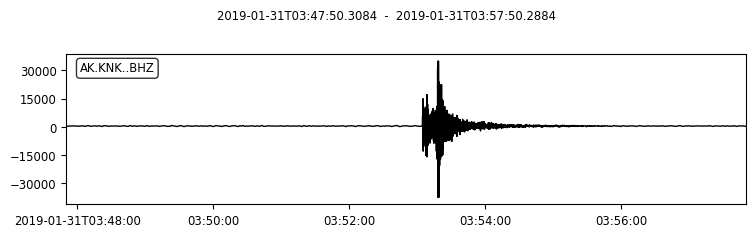

47.0042637346


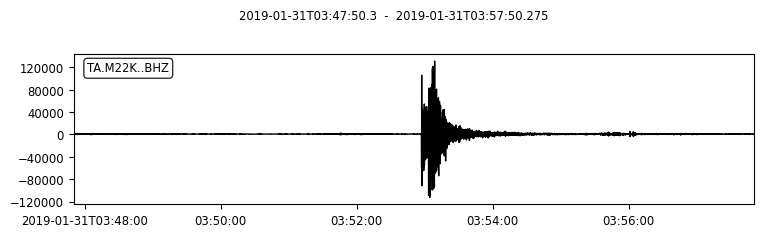

374.874551799


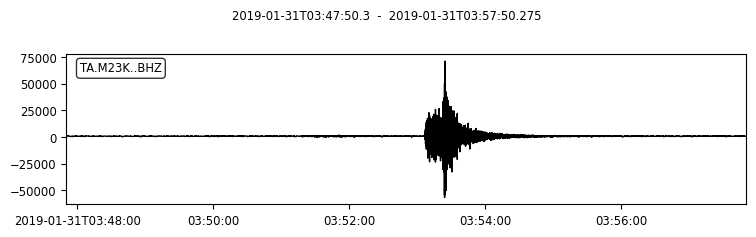

60.5404419661


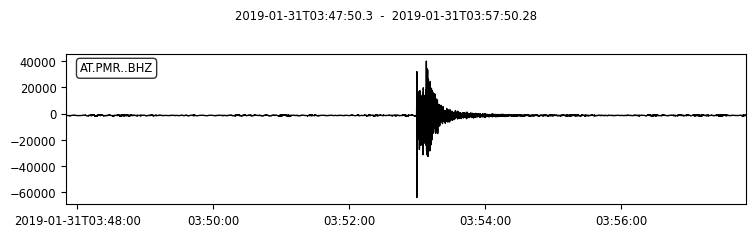

215.610976276


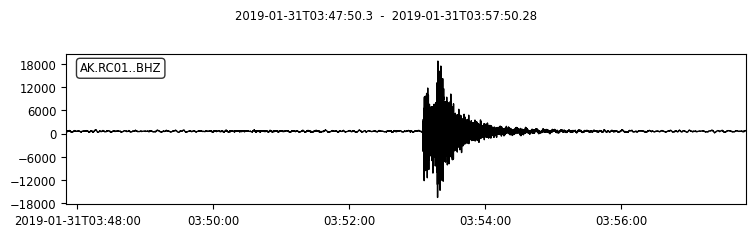

23.5700639347


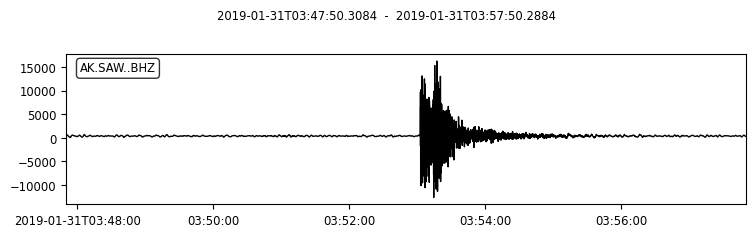

97.9665995878


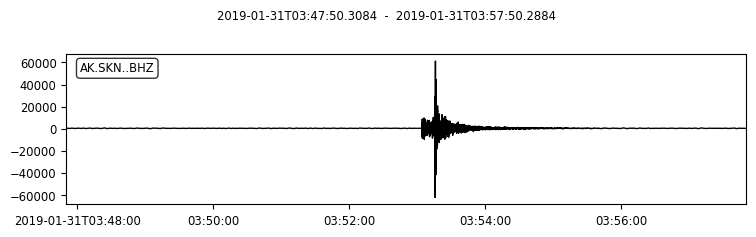

31.1655137532


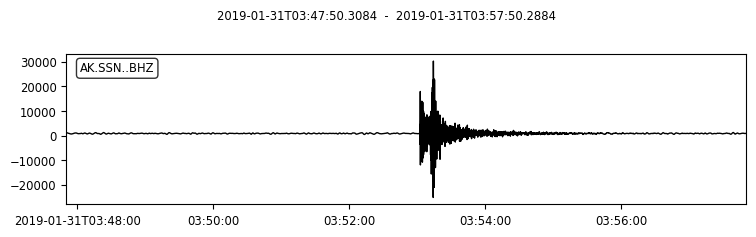

81.3768146563
saved!
20190131_031714.a
6 Trace(s) in Stream:
PR.PCDR..BHE | 2019-01-31T03:12:14.825000Z - 2019-01-31T03:22:14.800000Z | 40.0 Hz, 24000 samples
PR.PCDR..BHN | 2019-01-31T03:12:14.825000Z - 2019-01-31T03:22:14.800000Z | 40.0 Hz, 24000 samples
PR.PCDR..BHZ | 2019-01-31T03:12:14.825000Z - 2019-01-31T03:22:14.800000Z | 40.0 Hz, 24000 samples
PR.SMDR..BHE | 2019-01-31T03:12:14.830000Z - 2019-01-31T03:22:14.805000Z | 40.0 Hz, 24000 samples
PR.SMDR..BHN | 2019-01-31T03:12:14.830000Z - 2019-01-31T03:22:14.805000Z | 40.0 Hz, 24000 samples
PR.SMDR..BHZ | 2019-01-31T03:12:14.830000Z - 2019-01-31T03:22:14.805000Z | 40.0 Hz, 24000 samples


In [19]:
import random 
#fig, axs = plt.subplots(1,2, figsize = (12.9, 9))
snr_list = []
picks_sample = []
mag_list = []
for i in range(0,10):
    eq_no = i#eq_no = random.randint(0, len(eq_with_data))
    snr_list.append([])
    picks_sample.append([])
    mag_list.append([])
    print(eq_with_data[eq_no])
    st = obspy.read(root+eq_with_data[eq_no]+'/data/*/*')
    print(st)
    #print(print(st.__str__(extended=True)))
    with open(root+eq_with_data[eq_no]+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
        #print(picks)
    inv = obspy.read_inventory(root+eq_with_data[eq_no]+'/station_xml_files/*')
    #print(inv)
    if len(picks)>0:
        fig, axs = plt.subplots(1,2, figsize = (12.8, 9))
        for tr_no in range(0, len(st)):
            tr = st[tr_no]
            tr_name = st[tr_no].stats.network+'.'+st[tr_no].stats.station+'.'+st[tr_no].stats.location
            #print(tr_name, st[tr_no].stats.channel)
            try:
                if tr.stats.channel[2] == 'Z':
                    tr.plot()
                    pick = picks[tr_name]
                    pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                    #print(pick_samples)
                    picks_sample[eq_no].append(pick_samples)
                    tr.remove_response(inv)
                    tr.filter('bandpass', freqmin = 0.075, freqmax = 10)
                    #tr.filter('bandpass', freqmin = 0.1, freqmax = 3)
                    snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                    snr_list[eq_no].append(snr)
                    sr = tr.stats.sampling_rate
                    mag_list[eq_no].append(cat_with_data[eq_no].magnitudes[0].mag)
                    print(snr)
                    if snr>10:
                        axs[0].plot(tr.data[pick_samples-700:pick_samples+500])
                        axs[0].set_title('snr (0:500/-700:-200)>6')
                    else:
                        axs[1].plot(tr.data[pick_samples-700:pick_samples+500])
                        axs[1].set_title('snr (0:500/-700:-200)<6')
                #print('success')
            except:
                #print('failed')
                continue #print('no pick')
            '''tr = st[0]
            print(tr)
            a = os.listdir(root+eq_with_data[eq_no]+'/station_xml_files/')
            #inv2 = inv.select(network = tr.stats.network, station = tr.stats.station)
            inv = obspy.read_inventory(root+eq_with_data[1]+'/station_xml_files/'+tr.stats.network+'.'+tr.stats.station+'.xml')
            #print(inv)
            ppsd = PPSD(tr.stats, metadata=inv, ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
            print(ppsd.add(tr))
            eq_name = eq_with_data[eq_no]'''
        #plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/snr/'+eq_with_data[eq_no]+'.png')
        print('saved!')

In [42]:
axs[0].set_title('test')

Text(0.5, 1.0, 'test')

(0.0, 10.0)

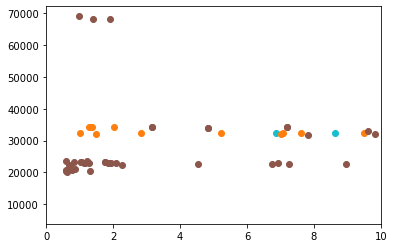

In [8]:
for i in range(0, len(snr_list)):
    plt.scatter(snr_list[i], picks_sample[i])
plt.xlim([0, 10])

(0.0, 100.0)

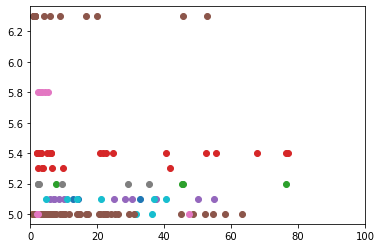

In [50]:
for i in range(0, len(snr_list)):
    plt.scatter(snr_list[i], mag_list[i])
plt.xlim([0,100])

In [18]:
with open('//home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/20180125_172434.a/picks.pkl', 'rb') as f:
    p = pickle.load(f)

In [19]:
p

{}

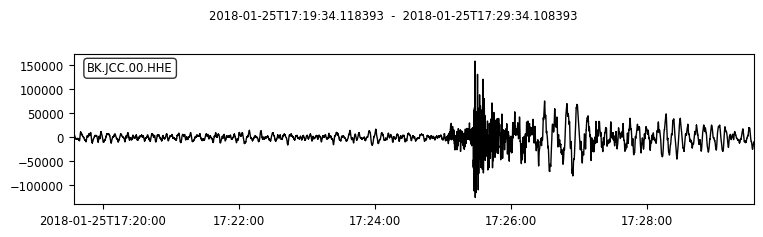

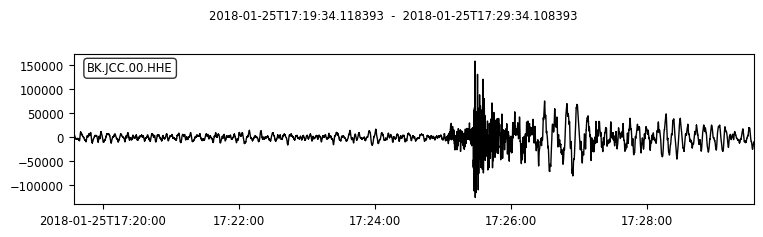

In [16]:
st[0].plot()

In [23]:
for eq_no in range(0, 10):
    eq_name = eq_with_data[eq_no]
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    print(eq_no, len(picks))

0 0
1 0
2 0
3 11
4 0
5 7
6 2
7 0
8 0
9 3


/tmp/ipykernel_154708/312221159.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  snr_list_all = np.concatenate(np.array(snr_list))


(array([ 61.,  30.,  19.,  10.,  10.,   7.,   4.,   3.,   5.,   0.,   3.,
          2.,   3.,   3.,   1.,   3.,   1.,   1.,   0.,   2.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0., 

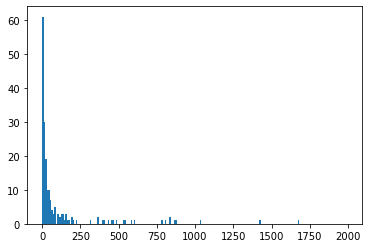

In [92]:
snr_list_all = np.concatenate(np.array(snr_list))
plt.hist(snr_list_all, np.arange(0, 2000, 10))

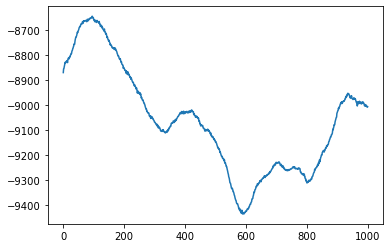

In [76]:
plt.plot(st[0].data[0:1000])


In [29]:
inv.select(network = tr.stats.network, station = tr.stats.station)

Inventory created at 2022-02-08T04:12:47.000000Z
	Created by: NCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.ncedc.org/fdsnws/station/1/query?net=BK&sta=JCC&cha=...
	Sending institution: NCEDC (NCEDC)
	Contains:
		Networks (1):
			BK
		Stations (1):
			BK.JCC (Jacoby Creek, Bayside, CA, USA)
		Channels (3):
			BK.JCC.00.HHZ, BK.JCC.00.HHN, BK.JCC.00.HHE

In [13]:
ppsd = PPSD(tr.stats, metadata=inv)

In [31]:
ppsd.add(st)

False

In [15]:
ppsd